# Deep learning: singleton classification in XRENNER


In [1]:
cd ~/Desktop/deep_xrenner/

/Users/zangsir/Desktop/deep_xrenner


In [2]:
ls

Data/               mlp_update.py       singleton_net.p     xrenner_xrenner.py


In [3]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

want: in the notMNIST data set like this:

Training set (200000, 28, 28) (200000,)

Validation set (10000, 28, 28) (10000,)

Test set (10000, 28, 28) (10000,)

and after transformation:

Training set (200000, 784) (200000, 10)

Validation set (10000, 784) (10000, 10)

Test set (10000, 784) (10000, 10)

## load data

In [122]:
def load_data(datafile):
    data = np.loadtxt(datafile, delimiter=',')

    # first ten values are the one hot encoded y (target) values
    ####y = data[:, 0:10]
    y = data[:, -1]
    # y[y == 0] = -1 # if you are using a tanh transfer function make the 0 into -1
    # y[y == 1] = .90 # try values that won't saturate tanh

    data = data[:, :-1]  # x data
    # data = data - data.mean(axis = 1)
    data -= data.min()  # scale the data so values are between 0 and 1
    data /= data.max()  # scale
    out = []
    labels=[]
    print(data.shape)
    label_dict={1:[0,1],0:[1,0]}
    # populate the tuple list with the data
    for i in range(data.shape[0]):
        fart = list((data[i, :].tolist()))  # don't mind this variable name
        out.append(fart)
        #two classes one hot coding:two classes are [NS,S] y=1:[0,1]; y=0:[1,0]
        labels.append(label_dict[y[i]])

    return np.array(out,dtype=np.float32),np.array(labels,dtype=np.float32)

In [98]:
datafile='Data/singleton_data_mini.tab'
X,labels = load_data(datafile)


(40000, 14)


In [36]:
X.shape[0]

40000

In [101]:
X

array([[  6.71140943e-03,   2.68456377e-02,   0.00000000e+00, ...,
          0.00000000e+00,   6.10128103e-04,   1.13177221e-05],
       [  1.34228189e-02,   6.71140943e-03,   6.71140943e-03, ...,
          0.00000000e+00,   1.22025621e-03,   2.26354441e-05],
       [  6.71140943e-03,   1.34228189e-02,   0.00000000e+00, ...,
          0.00000000e+00,   2.44051241e-03,   4.52708882e-05],
       ..., 
       [  6.71140943e-03,   2.68456377e-02,   0.00000000e+00, ...,
          0.00000000e+00,   4.72849282e-03,   2.08693999e-03],
       [  1.94630876e-01,   2.01342274e-02,   6.71140943e-03, ...,
          0.00000000e+00,   4.88102483e-03,   2.11065519e-03],
       [  5.36912754e-02,   1.34228189e-02,   1.34228189e-02, ...,
          0.00000000e+00,   5.79621736e-03,   2.25294661e-03]], dtype=float32)

In [32]:
labels

array([[0, 1],
       [0, 1],
       [1, 0],
       ..., 
       [0, 1],
       [0, 1],
       [0, 1]])

## divide into dev, val, test sets

In [111]:
train_prop=0.9
val_prop=0.05
test_prop=0.05

train_size=X.shape[0]*train_prop
val_size=X.shape[0]*val_prop
test_size=X.shape[0]*test_prop

#should shuffle the dataset

In [50]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

In [113]:
#pipeline
#load data
datafile='Data/singleton_data_mini.tab'
X,labels = load_data(datafile)

#shuffle dataset
dataset_shf,labels_shf = randomize(X, labels)

#get sizes of division
train_dataset=dataset_shf[:int(train_size),:]
valid_dataset=dataset_shf[int(train_size):int(train_size+val_size),:]
test_dataset=dataset_shf[int(train_size+val_size):,:]
train_labels=labels_shf[:int(train_size)]
valid_labels=labels_shf[int(train_size):int(train_size+val_size)]
test_labels=labels_shf[int(train_size+val_size):]

#divide the dataset
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [115]:
train_dataset

array([[ 0.02684564,  0.00671141,  0.        , ...,  0.        ,
         0.00503356,  0.00433419],
       [ 0.00671141,  0.02684564,  0.        , ...,  0.        ,
         0.0059657 ,  0.00409857],
       [ 0.06711409,  0.02013423,  0.        , ...,  0.        ,
         0.00198292,  0.00483374],
       ..., 
       [ 0.01342282,  0.01342282,  0.        , ...,  0.        ,
         0.00491079,  0.00612212],
       [ 0.02013423,  0.02013423,  0.        , ...,  0.        ,
         0.00233882,  0.00421499],
       [ 0.06040268,  0.02013423,  0.00671141, ...,  0.        ,
         0.00457596,  0.00025422]], dtype=float32)

In [106]:
print (train_dataset.shape,train_labels.shape)
print (valid_dataset.shape,valid_labels.shape)
print (test_dataset.shape,test_labels.shape)

(36000, 14) (36000, 2)
(2000, 14) (2000, 2)
(2000, 14) (2000, 2)


In [87]:
#wrote a function to return all the singleton indexes, but accidentlly deleted that. 

In [116]:
#check if the labels are still good after shuffling
#it is good. 
print (train_dataset[12],train_labels[12])
print (train_dataset[39],train_labels[39])
print (train_dataset[10001],train_labels[10001])

[ 0.00671141  0.02684564  0.          0.          0.          0.          0.
  0.          0.00671141  0.          0.          0.          0.00494525
  0.00033726] [ 0.  1.]
[ 0.01342282  0.02013423  0.00671141  0.          0.          0.          0.
  0.00671141  0.          0.          0.          0.          0.00064533
  0.00386733] [ 0.  1.]
[ 0.02684564  0.02013423  0.00671141  0.          0.          0.          0.
  0.          0.00671141  0.          0.          0.          0.00366077
  0.00437005] [ 0.  1.]


In [117]:
train_dataset

array([[ 0.02684564,  0.00671141,  0.        , ...,  0.        ,
         0.00503356,  0.00433419],
       [ 0.00671141,  0.02684564,  0.        , ...,  0.        ,
         0.0059657 ,  0.00409857],
       [ 0.06711409,  0.02013423,  0.        , ...,  0.        ,
         0.00198292,  0.00483374],
       ..., 
       [ 0.01342282,  0.01342282,  0.        , ...,  0.        ,
         0.00491079,  0.00612212],
       [ 0.02013423,  0.02013423,  0.        , ...,  0.        ,
         0.00233882,  0.00421499],
       [ 0.06040268,  0.02013423,  0.00671141, ...,  0.        ,
         0.00457596,  0.00025422]], dtype=float32)

In [118]:
num_nodes= 1024
batch_size = 128
input_size=X.shape[1]
num_labels=2

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,
                                      shape=(batch_size, input_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights_1 = tf.Variable(
      tf.truncated_normal([input_size, num_nodes]))
    biases_1 = tf.Variable(tf.zeros([num_nodes]))
    weights_2 = tf.Variable(
      tf.truncated_normal([num_nodes, num_labels]))
    biases_2 = tf.Variable(tf.zeros([num_labels]))

    # Training computation.
    relu_layer=tf.nn.relu(tf.matmul(tf_train_dataset, weights_1) + biases_1)#notice the shape of tf_train_dataset and weights_1
    logits = tf.matmul(relu_layer, weights_2) + biases_2
    loss = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(
     tf.matmul(tf.nn.relu(tf.matmul(tf_valid_dataset, weights_1) + biases_1), weights_2) + biases_2)
    test_prediction =  tf.nn.softmax(
     tf.matmul(tf.nn.relu(tf.matmul(tf_test_dataset, weights_1) + biases_1), weights_2) + biases_2)

In [120]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [278]:
np.argmax(predictions[11]

1

In [313]:
#precision=TP/(TP+FP)
#recall=TP/(TP+FN)

#TP+FP=
predicted_sgt=np.sum(np.argmax(predictions,1)==0)
print (predicted_sgt)
real_sgt=np.sum(np.argmax(batch_labels,1)==0)
print (real_sgt)

347
424


In [331]:
precision_recall(predictions,batch_labels)

0.40625 1.0


(0.40625, 1.0, 0.5777777777777777)

In [121]:
num_steps = 3001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 0.576419
Minibatch accuracy: 77.3%
Validation accuracy: 86.7%
Minibatch loss at step 500: 0.303830
Minibatch accuracy: 89.8%
Validation accuracy: 86.7%
Minibatch loss at step 1000: 0.433002
Minibatch accuracy: 83.6%
Validation accuracy: 86.7%
Minibatch loss at step 1500: 0.393721
Minibatch accuracy: 86.7%
Validation accuracy: 86.7%
Minibatch loss at step 2000: 0.296616
Minibatch accuracy: 89.8%
Validation accuracy: 86.7%
Minibatch loss at step 2500: 0.398171
Minibatch accuracy: 86.7%
Validation accuracy: 86.7%
Minibatch loss at step 3000: 0.321350
Minibatch accuracy: 89.8%
Validation accuracy: 86.7%
Test accuracy: 85.0%


In [218]:
def get_singleton(labels):
    inds_notsgt=[]
    inds_sgtn=[]
    for i in range(len(labels)):
        if labels[i][0]==1:
            inds_sgtn.append(i)
        else:
            inds_notsgt.append(i)
    return inds_notsgt,inds_sgtn

In [326]:
c,ind=get_singleton(valid_labels)

In [328]:
len(c)

4951

In [163]:
float(c)/len(labels)#ratio of singleton class

0.18648764977854296

In [164]:
len(ind)

67157

In [201]:
c

67157

<h1 style='background:blue;color:white;'>data process pipeline using tensorflow</h1>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [195]:
#pipeline
#load data
#datafile='Data/singleton_data_mini.tab'

datafile='Data/singleton_data.tab'
X,labels = load_data(datafile)

#shuffle dataset
dataset_shf,labels_shf = randomize(X, labels)

#get sizes of division
train_dataset=dataset_shf[:int(train_size),:]
valid_dataset=dataset_shf[int(train_size):int(train_size+val_size),:]
test_dataset=dataset_shf[int(train_size+val_size):,:]
train_labels=labels_shf[:int(train_size)]
valid_labels=labels_shf[int(train_size):int(train_size+val_size)]
test_labels=labels_shf[int(train_size+val_size):]

#divide the dataset
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

(360115, 12)


In [200]:
#set of a tf graph

num_nodes= 1
batch_size = 1024
input_size=X.shape[1]#dimension of each input vector
num_labels=2

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,
                                      shape=(batch_size, input_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights_1 = tf.Variable(
      tf.truncated_normal([input_size, num_nodes]))
    biases_1 = tf.Variable(tf.zeros([num_nodes]))
    weights_2 = tf.Variable(
      tf.truncated_normal([num_nodes, num_labels]))
    biases_2 = tf.Variable(tf.zeros([num_labels]))

    # Training computation.
    relu_layer=tf.nn.relu(tf.matmul(tf_train_dataset, weights_1) + biases_1)#notice the shape of tf_train_dataset and weights_1
    logits = tf.matmul(relu_layer, weights_2) + biases_2
    loss = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(
     tf.matmul(tf.nn.relu(tf.matmul(tf_valid_dataset, weights_1) + biases_1), weights_2) + biases_2)
    test_prediction =  tf.nn.softmax(
     tf.matmul(tf.nn.relu(tf.matmul(tf_test_dataset, weights_1) + biases_1), weights_2) + biases_2)


    num_steps = 6000
    train_acc=[]
    valid_acc=[]
    with tf.Session(graph=graph) as session:
        tf.initialize_all_variables().run()
        print("Initialized")
        for step in range(num_steps):
            # Pick an offset within the training data, which has been randomized.
            # Note: we could use better randomization across epochs.
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            # Generate a minibatch.
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            # Prepare a dictionary telling the session where to feed the minibatch.
            # The key of the dictionary is the placeholder node of the graph to be fed,
            # and the value is the numpy array to feed to it.
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
            _, l, predictions = session.run(
              [optimizer, loss, train_prediction], feed_dict=feed_dict)
            if (step % 500 == 0):
                print("Minibatch loss at step %d: %f" % (step, l))
                print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
                print("Validation accuracy: %.1f%%" % accuracy(
                valid_prediction.eval(), valid_labels))
                train_acc.append(accuracy(predictions, batch_labels))
                valid_acc.append(accuracy(
                valid_prediction.eval(), valid_labels))
        print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))


Initialized
Minibatch loss at step 0: 0.697906
Minibatch accuracy: 34.2%
Validation accuracy: 82.2%
Minibatch loss at step 500: 0.488197
Minibatch accuracy: 80.8%
Validation accuracy: 82.3%
Minibatch loss at step 1000: 0.466557
Minibatch accuracy: 82.2%
Validation accuracy: 82.3%
Minibatch loss at step 1500: 0.473457
Minibatch accuracy: 81.7%
Validation accuracy: 82.3%
Minibatch loss at step 2000: 0.472589
Minibatch accuracy: 81.8%
Validation accuracy: 82.3%
Minibatch loss at step 2500: 0.511490
Minibatch accuracy: 79.1%
Validation accuracy: 82.3%
Minibatch loss at step 3000: 0.477617
Minibatch accuracy: 81.3%
Validation accuracy: 82.3%
Minibatch loss at step 3500: 0.434291
Minibatch accuracy: 84.4%
Validation accuracy: 82.3%
Minibatch loss at step 4000: 0.514738
Minibatch accuracy: 79.0%
Validation accuracy: 82.3%
Minibatch loss at step 4500: 0.443015
Minibatch accuracy: 83.7%
Validation accuracy: 82.3%
Minibatch loss at step 5000: 0.478120
Minibatch accuracy: 81.4%
Validation accurac

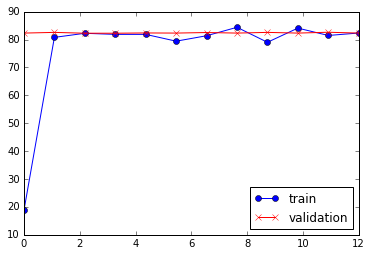

In [198]:
plot_tf()

#### comments & questions

-----
1. due to minibatch stochastic GD, the loss is not monotonically decreasing, and accuracy is not monotonically increasing. 
2. perhaps due to the nature of the dataset, the validation accuracy tend to be stuck at a constant for many steps. 
3. this is binary classification, but the class are imbalanced, so we should compute precision, recall, and F1 score.
4. num_steps, batch size, learning rate, num_nodes, so far I didn't observe a effect of changing these (hyper) parameters.
5. one observation is that validation accuracy is high on the first run. That might be due to the class imbalance. 

Questions

5. would using classic GD on all of dataset make a difference?
6. how to choose num_nodes?
7. does the class being binary (and imbalanced) make a difference than when we were doing the 10-class classification on the notMNIST dataset?


# log

## mini-dataset

Initialized
Minibatch loss at step 0: 0.582814
Minibatch accuracy: 75.8%
Validation accuracy: 85.4%
Minibatch loss at step 500: 0.416510
Minibatch accuracy: 82.8%
Validation accuracy: 86.1%
Minibatch loss at step 1000: 0.475506
Minibatch accuracy: 85.2%
Validation accuracy: 85.4%
Minibatch loss at step 1500: 0.329039
Minibatch accuracy: 88.3%
Validation accuracy: 85.4%
Minibatch loss at step 2000: 0.299905
Minibatch accuracy: 89.8%
Validation accuracy: 85.4%
Minibatch loss at step 2500: 0.272275
Minibatch accuracy: 92.2%
Validation accuracy: 85.4%
Minibatch loss at step 3000: 0.454670
Minibatch accuracy: 80.5%
Validation accuracy: 84.8%
Minibatch loss at step 3500: 0.303915
Minibatch accuracy: 88.3%
Validation accuracy: 85.4%
Minibatch loss at step 4000: 0.431240
Minibatch accuracy: 81.2%
Validation accuracy: 85.8%
Minibatch loss at step 4500: 0.289312
Minibatch accuracy: 90.6%
Validation accuracy: 85.4%
Minibatch loss at step 5000: 0.373971
Minibatch accuracy: 87.5%
Validation accuracy: 85.4%
Minibatch loss at step 5500: 0.358365
Minibatch accuracy: 86.7%
Validation accuracy: 85.4%
Minibatch loss at step 6000: 0.411559
Minibatch accuracy: 85.9%
Validation accuracy: 86.2%
Minibatch loss at step 6500: 0.382444
Minibatch accuracy: 85.2%
Validation accuracy: 85.4%
Minibatch loss at step 7000: 0.414857
Minibatch accuracy: 82.0%
Validation accuracy: 86.4%
Minibatch loss at step 7500: 0.339491
Minibatch accuracy: 86.7%
Validation accuracy: 85.5%
Minibatch loss at step 8000: 0.362756
Minibatch accuracy: 89.8%
Validation accuracy: 85.4%
Minibatch loss at step 8500: 0.351650
Minibatch accuracy: 85.2%
Validation accuracy: 85.4%
Minibatch loss at step 9000: 0.317820
Minibatch accuracy: 89.1%
Validation accuracy: 85.4%
Minibatch loss at step 9500: 0.336574
Minibatch accuracy: 87.5%
Validation accuracy: 85.5%
Test accuracy: 85.5%

## entire data set 

Initialized
Minibatch loss at step 0: 0.659597
Minibatch accuracy: 70.3%
Validation accuracy: 81.8%
Minibatch loss at step 500: 0.437850
Minibatch accuracy: 82.0%
Validation accuracy: 81.8%
Minibatch loss at step 1000: 0.565422
Minibatch accuracy: 73.4%
Validation accuracy: 80.8%
Minibatch loss at step 1500: 0.413734
Minibatch accuracy: 83.6%
Validation accuracy: 81.8%
Minibatch loss at step 2000: 0.493438
Minibatch accuracy: 78.9%
Validation accuracy: 81.8%
Minibatch loss at step 2500: 0.447245
Minibatch accuracy: 80.5%
Validation accuracy: 81.8%
Minibatch loss at step 3000: 0.430532
Minibatch accuracy: 82.0%
Validation accuracy: 81.8%
Minibatch loss at step 3500: 0.366882
Minibatch accuracy: 84.4%
Validation accuracy: 81.8%
Minibatch loss at step 4000: 0.415628
Minibatch accuracy: 84.4%
Validation accuracy: 81.8%
Minibatch loss at step 4500: 0.456031
Minibatch accuracy: 80.5%
Validation accuracy: 81.8%
Minibatch loss at step 5000: 0.491827
Minibatch accuracy: 77.3%
Validation accuracy: 81.8%
Minibatch loss at step 5500: 0.451488
Minibatch accuracy: 81.2%
Validation accuracy: 81.8%
Minibatch loss at step 6000: 0.467469
Minibatch accuracy: 84.4%
Validation accuracy: 81.8%
Minibatch loss at step 6500: 0.418132
Minibatch accuracy: 84.4%
Validation accuracy: 81.8%
Minibatch loss at step 7000: 0.438457
Minibatch accuracy: 81.2%
Validation accuracy: 81.8%
Minibatch loss at step 7500: 0.495283
Minibatch accuracy: 77.3%
Validation accuracy: 81.7%
Minibatch loss at step 8000: 0.420322
Minibatch accuracy: 84.4%
Validation accuracy: 81.8%
Minibatch loss at step 8500: 0.432092
Minibatch accuracy: 80.5%
Validation accuracy: 81.8%
Minibatch loss at step 9000: 0.460472
Minibatch accuracy: 82.0%
Validation accuracy: 81.8%
Minibatch loss at step 9500: 0.455226
Minibatch accuracy: 83.6%
Validation accuracy: 81.8%
Test accuracy: 81.3%

actually, the imbalance of the classes is a problem in this case since the mini batch is likely to get not much of the rare class. 

## Trying to construct a balanced subset and see what happens
also, implement precision and recall

In [ ]:
#http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
#some tactics to overcome the imbalanced class problem. including resampling (oversample, undersample)

### undersamping

In [238]:
# under sampling 
#first we have all singleton cases of size c;
#then we should randomly sample size roughly c of non-singleton 
#combine these two to form a dataset

#work with shuffled data sets
#dataset_shf,labels_shf
ind_notsgt,ind_sgt=get_singleton(labels_shf)
singleton_data=dataset_shf[ind_sgt]
notsgt_data=dataset_shf[ind_notsgt]
singleton_labels=labels_shf[ind_sgt]
notsgt_labels=labels_shf[ind_notsgt]
print (len(notsgt_data)+len(singleton_data)==len(labels_shf))
print (len(notsgt_data),len(singleton_data))

292958 67157


In [250]:
import random
num_notsgt_samples=100000
notsgt_inds=random.sample(xrange(len(notsgt_data)),num_notsgt_samples)

undersampled_notsgt=notsgt_data[notsgt_inds]
undersampled_notsgt_labels=notsgt_labels[notsgt_inds]
#construct the whole data set
undersampled_data=np.concatenate((undersampled_notsgt,singleton_data), axis=0)
undersampled_labels=np.concatenate((undersampled_notsgt_labels,singleton_labels), axis=0)

#construct the whole labels
#undersampled_notsgt_labels=
print (len(undersampled_data))


167157


In [256]:
int(len(undersampled_data)*0.9)

150441

In [356]:
def plot_tf(train,valid):
    x=np.linspace(0,len(train),len(train))
    plt.plot(x,train,'bo-',label='train')
    plt.plot(x,valid,'rx-',label='validation')
    plt.legend(loc=4)

In [262]:
dataset_shf_und,labels_shf_und = randomize(undersampled_data, undersampled_labels)

train_size=int(len(undersampled_data)*0.9)
val_size=int(len(undersampled_data)*0.05)
test_isze=int(len(undersampled_data)*0.05)

#get sizes of division
train_dataset=dataset_shf_und[:int(train_size),:]
valid_dataset=dataset_shf_und[int(train_size):int(train_size+val_size),:]
test_dataset=dataset_shf_und[int(train_size+val_size):,:]
train_labels=labels_shf_und[:int(train_size)]
valid_labels=labels_shf_und[int(train_size):int(train_size+val_size)]
test_labels=labels_shf_und[int(train_size+val_size):]

#divide the dataset
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

Initialized
Minibatch loss at step 0: 0.662868
Minibatch accuracy: 57.8%
Validation accuracy: 40.8%
Minibatch prec,recall,F1: 0.000 0.000 0.000
validation prec,recall,F1: 0.408 1.000 0.579
Minibatch loss at step 1000: 0.668403
Minibatch accuracy: 60.9%
Validation accuracy: 63.4%
Minibatch prec,recall,F1: 0.692 0.164 0.265
validation prec,recall,F1: 0.536 0.763 0.629
Minibatch loss at step 2000: 0.634103
Minibatch accuracy: 62.5%
Validation accuracy: 65.5%
Minibatch prec,recall,F1: 0.548 0.727 0.625
validation prec,recall,F1: 0.697 0.272 0.391
Minibatch loss at step 3000: 0.709713
Minibatch accuracy: 56.2%
Validation accuracy: 53.2%
Minibatch prec,recall,F1: 0.900 0.141 0.243
validation prec,recall,F1: 0.465 0.968 0.628
Minibatch loss at step 4000: 0.685800
Minibatch accuracy: 57.8%
Validation accuracy: 64.4%
Minibatch prec,recall,F1: 0.000 0.000 0.000
validation prec,recall,F1: 0.548 0.728 0.625
Minibatch loss at step 5000: 0.676577
Minibatch accuracy: 56.2%
Validation accuracy: 61.7%


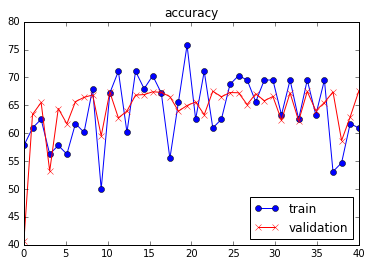

In [405]:
#set of a tf graph

num_nodes= 1024
batch_size = 128
input_size=X.shape[1]#dimension of each input vector
num_labels=2

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,
                                      shape=(batch_size, input_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights_1 = tf.Variable(
      tf.truncated_normal([input_size, num_nodes]))
    biases_1 = tf.Variable(tf.zeros([num_nodes]))
    weights_2 = tf.Variable(
      tf.truncated_normal([num_nodes, num_labels]))
    biases_2 = tf.Variable(tf.zeros([num_labels]))

    # Training computation.
    relu_layer=tf.nn.relu(tf.matmul(tf_train_dataset, weights_1) + biases_1)#notice the shape of tf_train_dataset and weights_1
    logits = tf.matmul(relu_layer, weights_2) + biases_2
    loss = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(
     tf.matmul(tf.nn.relu(tf.matmul(tf_valid_dataset, weights_1) + biases_1), weights_2) + biases_2)
    test_prediction =  tf.nn.softmax(
     tf.matmul(tf.nn.relu(tf.matmul(tf_test_dataset, weights_1) + biases_1), weights_2) + biases_2)


num_steps = 40000
train_acc=[]
valid_acc=[]
train_F1=[]
valid_F1=[]
loss_log=[]
    
    
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print("Initialized")
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run(
          [optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 1000 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print("Validation accuracy: %.1f%%" % accuracy(
            valid_prediction.eval(), valid_labels))
            
            print("Minibatch prec,recall,F1: %.3f %.3f %.3f"  % precision_recall(predictions, batch_labels))
            print("validation prec,recall,F1: %.3f %.3f %.3f" % precision_recall(
            valid_prediction.eval(), valid_labels))
            
            
            loss_log.append(l)
            train_acc.append(accuracy(predictions, batch_labels))
            valid_acc.append(accuracy(
            valid_prediction.eval(), valid_labels))
            train_F1.append(precision_recall(predictions, batch_labels))
            valid_F1.append(precision_recall(
            valid_prediction.eval(), valid_labels))
            print("===================")
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
    print("Test accuracy: %.3f %.3f %.3f" % precision_recall(test_prediction.eval(), test_labels))
plot_tf(train_acc,valid_acc)
plt.title('accuracy')

In [ ]:
#https://www.coursera.org/learn/machine-learning/lecture/9zJUs/mini-batch-gradient-descent

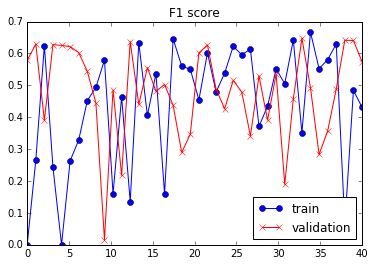

In [406]:
#plot F1 scores
f1t=[i[2] for i in train_F1]
f1v=[i[2] for i in valid_F1]
plot_tf(f1t,f1v)
plt.title('F1 score')


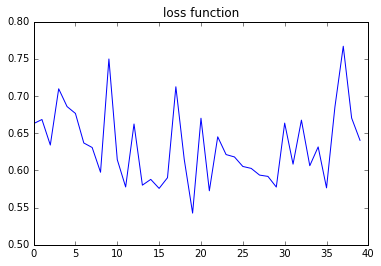

In [407]:

plt.plot(loss_log)
plt.title('loss function')

In [362]:
def precision_recall(predictions,labels):
#TP=np.sum(np.argmax(predictions, 1) == np.argmax(batch_labels, 1) == 0)

    TP=0
    predicted_sgt=np.sum(np.argmax(predictions,1)==0)
    real_sgt=np.sum(np.argmax(labels,1)==0)
    #print('[predicted_sgt:'+str(predicted_sgt)+"  real_sgt:"+str(real_sgt)+']')

    for i in range(len(predictions)):
        if np.argmax(predictions[i]) == np.argmax(labels[i]) == 0:
            TP+=1
    if predicted_sgt!=0:
        precision=float(TP)/predicted_sgt
    else:
        precision=0
    
    recall=float(TP)/real_sgt
    #print ("["+str(precision)+str(recall)+']')
    if precision==recall==0:
        F1=0
    else:
        F1=(2*precision*recall)/(precision+recall)
    return precision,recall,F1